# Fashion Image Classification
## Written by Leo Carrico

This project will be using deep learning to classify objects within 28x28 images. These objects will be different types of clothing.<br>
The types of clothing are:

0. T-shirt/Top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

## Import the Data

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [375]:
fashion_test_df = pd.read_csv("datasets/fashion-mnist_test.csv")
fashion_train_df = pd.read_csv("datasets/fashion-mnist_train.csv")

In [376]:
label_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

## Visualizing the Dataset

In [377]:
fashion_train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [378]:
fashion_test_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [379]:
print(f"Train data shape: {fashion_train_df.shape}")
print(f"Test data shape: {fashion_test_df.shape}")

Train data shape: (60000, 785)
Test data shape: (10000, 785)


In [380]:
training = fashion_train_df.to_numpy(dtype='float32')
testing = fashion_test_df.to_numpy(dtype='float32')

In [381]:
import random

Image number: 37155
Image type: Bag


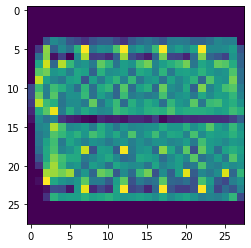

In [382]:
i = random.randint(1, 60000)
print("Image number:", i)

label_i = int(training[i, 0])
print(f"Image type: {label_names[label_i]}")
plt.imshow(training[i, 1:].reshape(28,28))

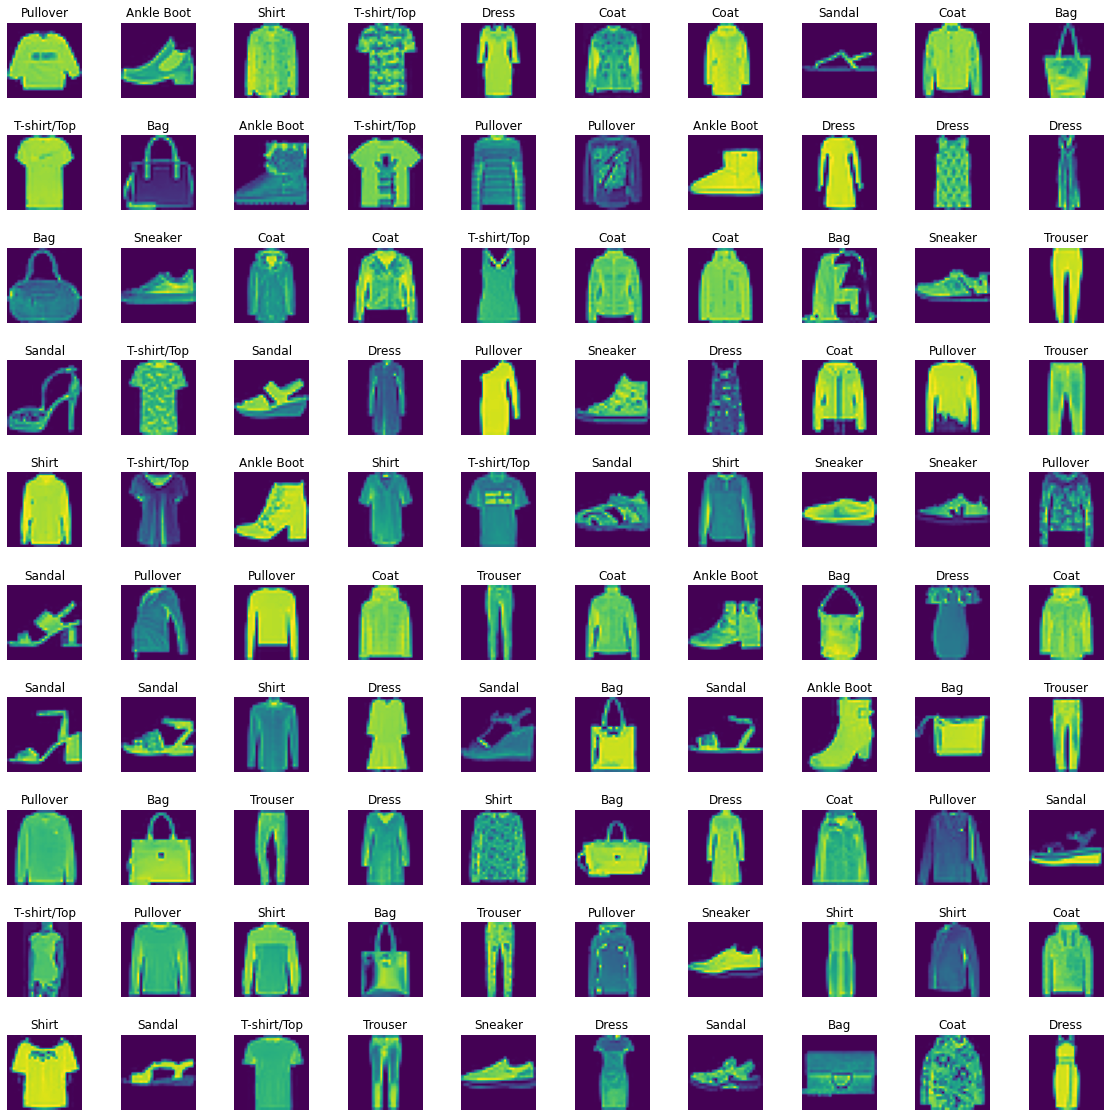

In [383]:
# number of cols/rows
rows = 10
cols = 10

# subplot(r,c) provide the no. of rows and columns
f, ax = plt.subplots(rows, cols, figsize=(20,20))

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(rows):
    for j in range(cols):
        label_i = int(training[(i*rows)+j, 0])
        ax[i, j].set_title(f"{label_names[label_i]}")
        ax[i, j].axis('off')
        ax[i, j].imshow(training[(i*rows)+j, 1:].reshape(28,28))
        
plt.subplots_adjust(hspace=.5)

## Train our model

In [384]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [385]:
from sklearn.model_selection import train_test_split

In [386]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [387]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_validate = X_validate.reshape(X_validate.shape[0], 28, 28, 1)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")
print(f"Validate shape: {X_validate.shape}")

Train shape: (48000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)
Validate shape: (12000, 28, 28, 1)


In [388]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [389]:
cnn_model = Sequential()

In [390]:
cnn_model.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))

In [391]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [392]:
cnn_model.add(Flatten())

In [393]:
cnn_model.add(Dense(units=32, activation="relu"))

In [394]:
cnn_model.add(Dense(units=10, activation="sigmoid"))

In [395]:
cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [396]:
epochs = 50
cnn_model.fit(X_train, y_train, batch_size=512, epochs=epochs, verbose=1, validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 2s 18ms/step - loss: 1.7764 - accuracy: 0.4113 - val_loss: 0.8305 - val_accuracy: 0.7060
Epoch 2/50
94/94 [==============================] - 1s 15ms/step - loss: 0.7734 - accuracy: 0.7213 - val_loss: 0.6615 - val_accuracy: 0.7551
Epoch 3/50
94/94 [==============================] - 1s 15ms/step - loss: 0.6533 - accuracy: 0.7620 - val_loss: 0.6065 - val_accuracy: 0.7744
Epoch 4/50
94/94 [==============================] - 2s 17ms/step - loss: 0.5951 - accuracy: 0.7802 - val_loss: 0.5569 - val_accuracy: 0.7981
Epoch 5/50
94/94 [==============================] - 2s 18ms/step - loss: 0.5563 - accuracy: 0.7960 - val_loss: 0.5274 - val_accuracy: 0.8043
Epoch 6/50
94/94 [==============================] - 2s 19ms/step - loss: 0.5272 - accuracy: 0.8093 - val_loss: 0.5091 - val_accuracy: 0.8117
Epoch 7/50
94/94 [==============================] - 2s 20ms/step - loss: 0.5094 - accuracy: 0.8145 - val_loss: 0.4960 - val_accuracy: 0.8198
Epoch 8/50
94

## Evaluating our CNN 

In [397]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test accuracy: {round(evaluation[1]*100, 2)}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8681
Test accuracy: 86.81%


In [398]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

c:\users\2014722\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [399]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

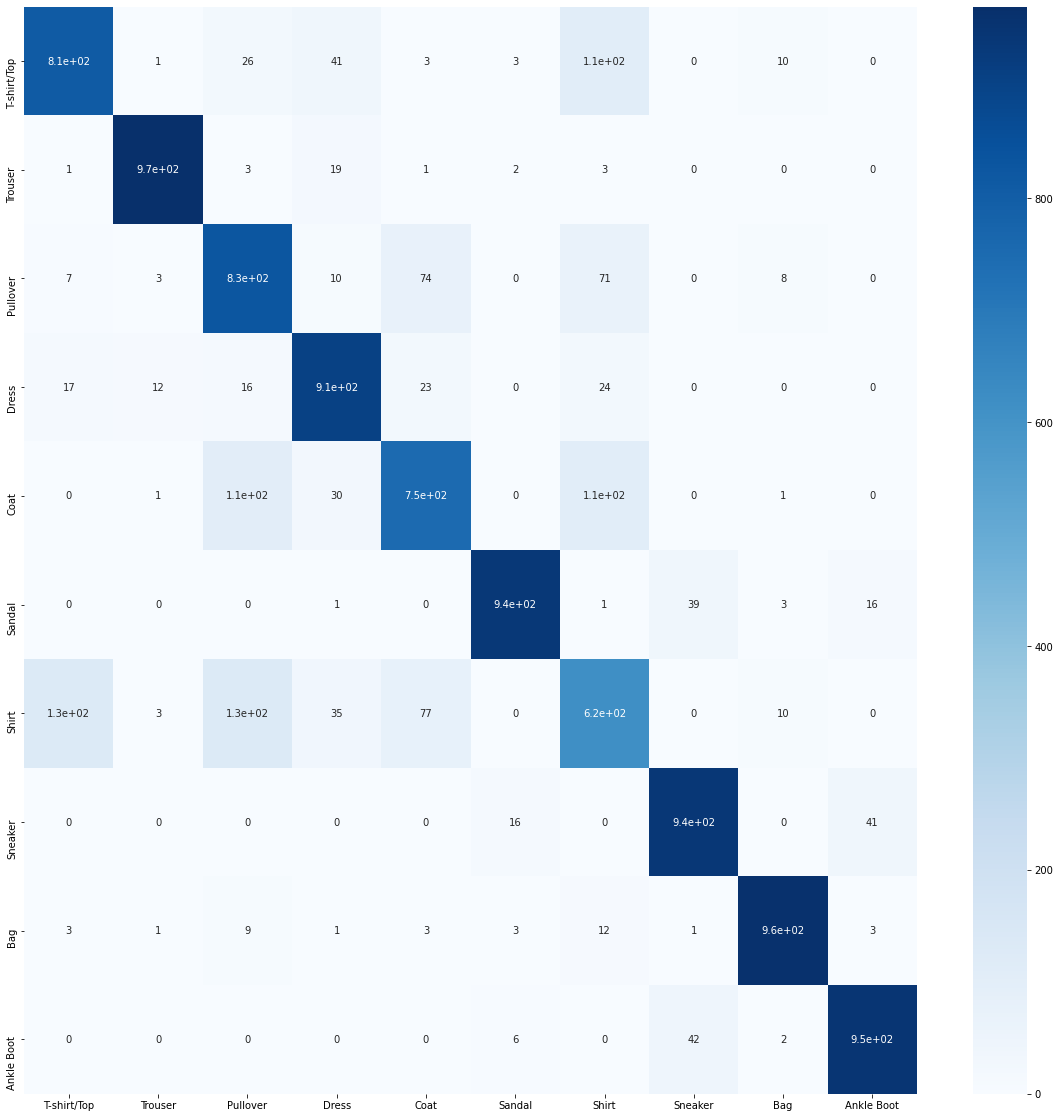

In [400]:
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(20,20))
sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=label_names, yticklabels=label_names)

In [401]:
print(classification_report(y_test, predicted_classes, target_names=label_names))

              precision    recall  f1-score   support

 T-shirt/Top       0.84      0.81      0.82      1000
     Trouser       0.98      0.97      0.97      1000
    Pullover       0.74      0.83      0.78      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.81      0.75      0.78      1000
      Sandal       0.97      0.94      0.95      1000
       Shirt       0.65      0.61      0.63      1000
     Sneaker       0.92      0.94      0.93      1000
         Bag       0.97      0.96      0.96      1000
  Ankle Boot       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In conclusion, we can see that it is possible to classify articles of clothing using convolutional neural networks. <br>
It is very possible to expand on this to create or identify entire outfits using a similar CNN technique.